# BIOMEDICAL IMAGE ANALYSIS /WITH PYTHON
 [datacamp.com](www.datacamp.com)



In [ ]:
# Project Folder:
%cd /content/drive/MyDrive/2020_08_Biomedical_Image_Processing_Datacamp

/content/drive/MyDrive/2020_08_Biomedical_Image_Processing_Datacamp


In [ ]:
import imageio

In [ ]:
!curl -OL https://github.com/tensorflow/io/raw/master/docs/tutorials/dicom/dicom_00000001_000.dcm
!ls -l dicom_00000001_000.dcm

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   164    0   164    0     0    575      0 --:--:-- --:--:-- --:--:--   575
100 1024k  100 1024k    0     0   643k      0  0:00:01  0:00:01 --:--:--  936k
-rw------- 1 root root 1049332 Feb  4 11:25 dicom_00000001_000.dcm


In [ ]:
# Install required Packages, and restart runtime
try:
  # Use the Colab's preinstalled TensorFlow 2.x
  %tensorflow_version 2.x 
except:
  pass

In [ ]:
!pip install tensorflow-io

     |████████████████████████████████| 25.3MB 1.5MB/s 


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import imageio

import scipy.ndimage as ndi
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_io as tfio

In [ ]:
im = imageio.imread('./Data/dicom_00000001_000.dcm')

In [ ]:
# Print image attributes
print('Image type:', type(im))
print('Shape of image array:', im.shape)

Image type: <class 'imageio.core.util.Array'>
Shape of image array: (1024, 1024)


In [ ]:
# Stacking multiple images

# Import ImageIO and NumPy
import imageio
import numpy as np

# Read in each 2D image
im1 = imageio.imread('./Data/ID00007637202177411956430/1.dcm')
im2 = imageio.imread('./Data/ID00007637202177411956430/10.dcm')
im3 = imageio.imread('./Data/ID00007637202177411956430/11.dcm')
print(im1.shape)

# Stack images into a volume
vol = np.stack([im1, im2, im3], axis=0)

print('Volume dimensions:', vol.shape)

(512, 512)
Volume dimensions: (3, 512, 512)


In [ ]:
# Load the directory of dcm images:
vol = imageio.volread('./Data/ID00007637202177411956430')

# Print image attributes
print('Available metadata:', vol.meta.keys())
print('Shape of image array:', vol.shape)

Reading DICOM (examining files): 1/30 files (3.3%)30/30 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 30/30  (100.0%)
Available metadata: odict_keys(['TransferSyntaxUID', 'SOPInstanceUID', 'Modality', 'Manufacturer', 'PatientName', 'PatientID', 'PatientSex', 'StudyInstanceUID', 'SeriesInstanceUID', 'InstanceNumber', 'ImagePositionPatient', 'ImageOrientationPatient', 'SamplesPerPixel', 'Rows', 'Columns', 'PixelSpacing', 'BitsAllocated', 'BitsStored', 'HighBit', 'PixelRepresentation', 'RescaleIntercept', 'RescaleSlope', 'PixelData', 'shape', 'sampling'])
Shape of image array: (30, 512, 512)


#CHAPTER 3: MEASUREMENT#

## Objects and Labels
In this chapter, we'll discuss how you can measure one or more component parts of your image. We'll start by learning how to label objects.

[link text](https:// [link text](https:// [link text](https://)))

### Segmentation splits an image into parts
Segmentation is the process of splitting an image into separate objects. Since whole careers can be spent developing segmentation techniques, we will focus mostly on how to analyze the resulting objects.


### Sunnybrook Cardiac Database
For this chapter, we will analyze cardiac magnetic resonance imaging data from the Sunnybrook Cardiac Database. Each Sunnybrook dataset contains a 3D time series of a person's heart over the course of a single heartbeat. The end goal is to measure the proportion of blood that's pumped out of the left ventricle, a measure known as the ejection fraction. In this image, the left ventricle is the circular cavity in the center. Abnormal ejection fractions can indicate urgent health issues.



### Labeling image components
Our first step towards calculating the ejection fraction is to segment the left ventricle from the rest of the image. For these MRI data, fluid-filled areas have high-intensity values. So, one approach is to take the original image, filter it to reduce noise and smooth edges, then mask it to select pixels with relatively high values. This does a good job of segmenting the left ventricle, but now we need to remove the pixels that are part of other objects.

We can do this using SciPy's label() function. First, we'll create the mask we saw in the last slide by reading in the file, applying a small Gaussian filter, then masking pixels with intensities lower than 150. Next, we "label" the mask. The labeling algorithm treats 0 values as background pixels, and then it looks for all of the objects that are separated by background. It then returns an array where each object has been indexed, as well as the number of objects detected. It seems we have 14 distinct objects in this image. Plotting the labels with the rainbow colormap shows that the circular left ventricle region in the center has been assigned a unique label value.



### Label selection
You can now select individual objects by referencing their index value. To select pixels in the first object, you would use "where labels is 1, return the value from im, else return 0". Alternatively, you can select a number of labels meeting a condition. Calling "where labels is less than 3, return im, else 0" will select pixels from the first and second objects.


### Object extraction
A bounding box is the range of indices along each axis which completely enclose an object. You can use the bounding box to extract objects from the larger image. The find_objects() function can create these bounding boxes for you.

When you run find_objects() on a labeled array, it will return a list of bounding boxes. Each item in the returned list is a tuple of index ranges - one slice for each dimension. Indexing the original image using one of these boxes will yield an image cropped to that object. You could then analyze each of these arrays individually.

#### Exercise: Segment The Heart

In this chapter, we'll work with magnetic resonance (MR) imaging data from the Sunnybrook Cardiac Dataset. The full image is a 3D time series spanning a single heartbeat. These data are used by radiologists to measure the ejection fraction: the proportion of blood ejected from the left ventricle during each stroke.

To begin, segment the left ventricle from a single slice of the volume (im). First, you'll filter and mask the image; then you'll label each object with ndi.label().


In [ ]:
# Smooth intensity values
im_filt = ndi.median_filter(im, size=3)

# Select high-intensity pixels
mask_start = np.where(im_filt>60, 1, 0)
mask = ndi.binary_closing(mask_start)

# Label the objects in "mask"
labels, nlabels = ndi.label(mask)
print('Num. Labels:', nlabels)

Num. Labels: 103


#### Exercise: Select Objects
Labels are like object "handles" - they give you a way to pick up whole sets of pixels at a time. To select a particular object:

Find the label value associated with the object.
Create a mask of matching pixels.
For this exercise, create a labeled array from the provided mask. Then, find the label value for the centrally-located left ventricle, and create a mask for it.


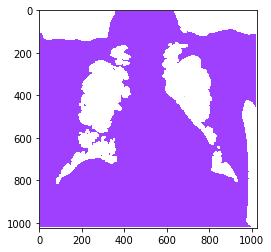

In [ ]:
'''
Plot the labels array on top of the original image. 
To create an overlay, use np.where to convert values of 0 to np.nan. 
Then, plot the overlay with the rainbow colormap and set alpha=0.75 to make it transparent.
'''
# Create a `labels` overlay
overlay = np.where(labels > 0, labels, np.nan)


# Use imshow to plot the overlay
plt.imshow(overlay, cmap='rainbow', alpha=0.75)
#format_and_render_plot()

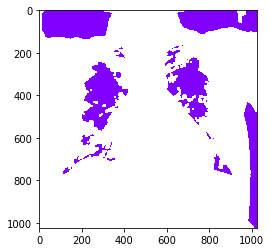

In [ ]:
# Label the image "mask"
labels, nlabels = ndi.label(mask)

# Select left ventricle pixels
lv_val = labels[128, 128]
lv_mask = np.where(labels == lv_val, 1, np.nan)

# Overlay selected label
plt.imshow(lv_mask, cmap='rainbow')
plt.show()

#### Exercise: Extract objects

Extracting objects from the original image eliminates unrelated pixels and provides new images that can be analyzed independently.

The key is to crop images so that they only include the object of interest. The range of pixel indices that encompass the object is the bounding box.

For this exercise, use ndi.find_objects() to create a new image containing only the left ventricle.

Number of objects: 1
Indices for first box: (slice(0, 1024, None), slice(0, 1024, None))


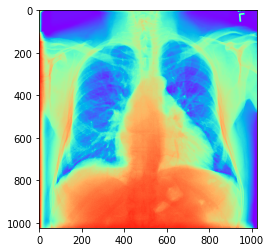

In [ ]:
# Create left ventricle mask
labels, nlabels = ndi.label(mask)
lv_val = labels[128, 128]
lv_mask = np.where(labels==lv_val, 1, 0)

# Find bounding box of left ventricle
bboxes = ndi.find_objects(lv_mask)
print('Number of objects:', len(bboxes))
print('Indices for first box:', bboxes[0])

# Crop to the left ventricle (index 0)
im_lv = im[bboxes[0]]

# Plot the cropped image
plt.imshow(im_lv, cmap='rainbow')
#format_and_render_plot()

## Measuring Intensity ##

Once objects have been segmented from the background, their properties can be efficiently measured using tools within SciPy.

For this lesson, we'll step up to measuring a full three-dimensional volume. We have segmented this volume into two parts: label 1 is the left ventricle, shown here in purple. Label 2 is a circular section from the middle of the image, which will be useful for comparison.



### Functions ###

SciPy has optimized many of the most common descriptive functions for image data, including the mean, median, and standard deviation. These functions summarize the array across all dimensions of an image, whether it be 2D, 3D, 4D, or more. They are especially useful when you have a labeled image because you can apply the function to every object independently with a single call. For custom calculations, you can also use the labeled_comprehension() function to summarize your data.


### Calling measurement functions ###
Which arguments you specify when you call measurement functions determines the pixels used for the calculation. Here, we have loaded the MRI volume and its corresponding labels. To get the mean intensity of the entire image, simply call ndimage dot mean() with the original volume. If you provide a mask or a labeled array, you will restrict the analysis to all non-zero pixels. However, if you provide a set of labels and an index value, you can get the mean intensity for a single label. On the other hand, if you pass a list of values to the index argument, the function will return a list of mean values - one for each object specified.


### Object histograms ###
This technique can be applied to some other SciPy tools, including the histogram function. In the previous chapter, we simply passed in our image array and then specified the minimum value, maximum value, and the number of bins to use. However, if you also include a label array and indices, ndimage dot histogram() will return distributions for each of the selected labels.

Plotting these object-level histograms is a great way to evaluate your segmentation. If you see very wide distributions or multiple peaks and valleys in your histogram, your labeled object may include many different tissue types. On the other hand, if the histogram resembles a normal distribution, your segmentation may be doing a good job. This is because the physical properties that influence intensity values should be relatively uniform throughout a tissue. For example, we expect that the voxels in our left ventricle label are filled with blood. Although we expect some variation in their intensity, we also expect them to be centered on some mean value. In this case, we can see that the majority of left ventricle intensity values are higher than the other labeled pixels. Although there are some low values, which are likely not part of the ventricle, the segmentation seems to do a good job overall.

Robust image segmentation is an entire research domain, but the simple principle is to leverage intensity and location information to differentiate objects of interest from the background. Once labeled, the objects can be manipulated easily.

#### Exercise: Measure Variance

SciPy measurement functions allow you to tailor measurements to specific sets of pixels:

*   Specifying labels restricts the mask to non-zero pixels.
*   Specifying index value(s) returns a measure for each label value.

For this exercise, calculate the intensity variance of vol with respect to different pixel sets. We have provided the 3D segmented image as labels: label 1 is the left ventricle and label 2 is a circular sample of tissue.

After printing the variances, select the true statement from the answers below.

In [ ]:
'''# Variance for all pixels
var_all = ndi.variance(vol)
print('All pixels:', var_all)

# Variance for labeled pixels
var_labels = ndi.variance(vol, labels)
print('Labeled pixels:', var_labels)

# Variance for each object
var_objects = ndi.variance(vol, labels, index=[1,2])
print('Left ventricle:', var_objects[0])
print('Other tissue:', var_objects[1])
'''

"# Variance for all pixels\nvar_all = ndi.variance(vol)\nprint('All pixels:', var_all)\n\n# Variance for labeled pixels\nvar_labels = ndi.variance(vol, labels)\nprint('Labeled pixels:', var_labels)\n\n# Variance for each object\nvar_objects = ndi.variance(vol, labels, index=[1,2])\nprint('Left ventricle:', var_objects[0])\nprint('Other tissue:', var_objects[1])\n"

####Exercise: Separate Histograms

A poor tissue segmentation includes multiple tissue types, leading to a wide distribution of intensity values and more variance.

On the other hand, a perfectly segmented left ventricle would contain only blood-related pixels, so the histogram of the segmented values should be roughly bell-shaped.

For this exercise, compare the intensity distributions within **vol** for the listed sets of pixels. Use **ndi.histogram**, which also accepts **labels **and index arguments.

In [ ]:
'''
# Create histograms for selected pixels
hist1 = ndi.histogram(vol, min=0, max=255, bins=256)
hist2 = ndi.histogram(vol, 0, 255, 256, labels=labels)
hist3 = ndi.histogram(vol, 0, 255, 256, labels=labels, index=1)

# Plot the histogram density
plt.plot(hist1 / hist1.sum(), label='All pixels')
plt.plot(hist2 / hist2.sum(), label='All labeled pixels')
plt.plot(hist3 / hist3.sum(), label='Left ventricle')
format_and_render_plot()
'''

"\n# Create histograms for selected pixels\nhist1 = ndi.histogram(vol, min=0, max=255, bins=256)\nhist2 = ndi.histogram(vol, 0, 255, 256, labels=labels)\nhist3 = ndi.histogram(vol, 0, 255, 256, labels=labels, index=1)\n\n# Plot the histogram density\nplt.plot(hist1 / hist1.sum(), label='All pixels')\nplt.plot(hist2 / hist2.sum(), label='All labeled pixels')\nplt.plot(hist3 / hist3.sum(), label='Left ventricle')\nformat_and_render_plot()\n"

##Measuring Morphology
Measuring object "morphology," or shape and size, is another principal aim of image analysis.

For example, if a patient goes in for an MRI and they find out they have a brain tumor, a natural first question might be: "How big is it?". Or, if they have been monitoring it for some time, they may want to know: "Has it grown?"

### Spatial extent
To measure the amount of space occupied by an object, we need two quantities: the size of each element in the array and the number of those elements in the object. Let's calculate the volume of the left ventricle in one of our cardiac images. First, we establish the amount of real, physical space taken up by each voxel. Recall that in DICOM images, we can find this in the "sampling" field of the metadata dictionary. Multiplying the lengths of the first, second, and third dimensions will give us the total volume at each voxel. In this case, the measurements are in cubic millimeters. Next, we want to count the number of voxels in the left ventricle. We can do this by passing a 1 as input to ndimage dot sum() and then providing it with the labeled array and index of our object. The function will weight each left ventricle voxel with a value of 1 and sum them. Finally, we multiply the number of voxels by their individual size to get the total volume of the object.



### Distance transformation
Another useful morphological measure is the distance of each voxel to the nearest background value. This information can help you identify the most embedded points within objects or mask out edge areas. To perform a distance transformation on a mask or label array, use the dist_transform_edt() function. This will return a new array, where each non-zero voxel has been replaced with the distance to the nearest background voxel. The maximum value, in this case, reflects how far from the edge the most embedded point is. If you have access to the sampling rates for each dimension, you can include these to generate values that reflect physical distance. You can see here that the max distance is reduced because the sampling rate is less than one millimeter per pixel.

### Center of mass
A complementary measure is the center of mass, which you can calculate directly. Mass, in this case, refers to intensity values, with larger values pulling the center towards them. Just like with the intensity measures, the center_of_mass() function accepts "labels" and "index" arguments. The function returns a tuple of coordinates for each object specified. For our cardiac data, the center of mass for the left ventricle corresponds to the center of the volume in all three dimensions.


####Exercise: Calculate Volume

Quantifying tissue morphology, or shape is one primary objective of biomedical imaging. The size, shape, and uniformity of a tissue can reveal essential health insights.

For this exercise, measure the volume of the left ventricle in one 3D image (vol).

First, count the number of voxels in the left ventricle (label value of 1). Then, multiply it by the size of each voxel in cubic mm.  (Check vol.meta for the sampling rate.)

In [ ]:
'''
number_of_pixels_LV = ndi.sum(1, labels, index=1)
d0, d1, d2 = vol.meta['sampling']
dvoxel = d0 * d1 * d2
print(number_of_pixels_LV*dvoxel)
'''

"\nnumber_of_pixels_LV = ndi.sum(1, labels, index=1)\nd0, d1, d2 = vol.meta['sampling']\ndvoxel = d0 * d1 * d2\nprint(number_of_pixels_LV*dvoxel)\n"

#### Exercise: Calculate Distance
A **distance transformation** calculates the distance from each pixel to a given point, usually the nearest background pixel. This allows you to determine which points in the object are more interior and which are closer to edges.

For this exercise, use the **Euclidian distance** transform on the left ventricle object in **labels**.

In [ ]:
'''
# Calculate left ventricle distances
lv = np.where(labels==1, 1, 0)
dists = ndi.distance_transform_edt(lv, sampling=vol.meta['sampling'])

# Report on distances
print('Max distance (mm):',ndi.maximum(dists))
print('Max location:',ndi.maximum_position(dists))

# Plot overlay of distances
overlay = np.where(dists[5] > 0, dists[5], np.nan) 
plt.imshow(overlay, cmap='hot')
format_and_render_plot()
'''

"\n# Calculate left ventricle distances\nlv = np.where(labels==1, 1, 0)\ndists = ndi.distance_transform_edt(lv, sampling=vol.meta['sampling'])\n\n# Report on distances\nprint('Max distance (mm):',ndi.maximum(dists))\nprint('Max location:',ndi.maximum_position(dists))\n\n# Plot overlay of distances\noverlay = np.where(dists[5] > 0, dists[5], np.nan) \nplt.imshow(overlay, cmap='hot')\nformat_and_render_plot()\n"

#### Exercise: Pinpoint center of mass

The distance transformation reveals the most embedded portions of an object. On the other hand, ndi.center_of_mass() returns the coordinates for the center of an object.

The "mass" corresponds to intensity values, with higher values pulling the center closer to it.

For this exercise, calculate the center of mass for the two labeled areas. Then, plot them on top of the image.

In [ ]:
'''
# Extract centers of mass for objects 1 and 2
coms = ndi.center_of_mass(vol, labels, index=[1,2])
print('Label 1 center:', coms[0])
print('Label 2 center:', coms[1])

# Add marks to plot
for c0, c1, c2 in coms:
    plt.scatter(c2, c1, s=100, marker='o')
plt.show()
'''

"\n# Extract centers of mass for objects 1 and 2\ncoms = ndi.center_of_mass(vol, labels, index=[1,2])\nprint('Label 1 center:', coms[0])\nprint('Label 2 center:', coms[1])\n\n# Add marks to plot\nfor c0, c1, c2 in coms:\n    plt.scatter(c2, c1, s=100, marker='o')\nplt.show()\n"

## Measuring in Time##

To cap off this chapter, let's solve our original problem: how to measure the ejection fraction of a person's heart.

### Ejection fraction
To calculate the ejection fraction, we have to find the left ventricle's volume when it's totally relaxed -- its maximum -- and when it's fully squeezed -- its minimum. Taking the difference between these two volumes and dividing by the maximum yields the fraction of blood that is pumped out and into the rest of the circulatory system.

One way to accomplish this is to: First, segment the left ventricle at each time point. Second, calculate the volume at each time point sequentially, using a for loop. This results in a 1D time series from which we can extract our minimum and maximum values. Values in hand, we plug them into the ejection fraction equation.

### Calculate volume for each time point
Let's assume that we have access to both the volumetric time series and the segmented left ventricle. The data are 4-dimensional, with time as the first dimension. First, we calculate the volume of each individual voxel. We extract the sampling rate along each dimension, then multiply the spatial dimensions together to get the space occupied by each element. Next, we instantiate an empty 1D array to record the volume at each time point. We then loop through each time point, counting the number of voxels in the left ventricle. Finally, we multiply the number of voxels by their volume and store the value in the time series array. The plot of the data lines up with our expectations: in the first few time points, there is a squeezing action on the ventricle, followed by relaxation, where it fills up again.

### Calculate ejection fraction
Now, it's simply a matter of selecting the lowest and highest values from the time series and calculating the ejection fraction. Since "ts" is a NumPy array, we can call the min() and max() methods to retrieve these values. Then, we find the difference and divide by the maximum volume. And that's it! We've put together an estimate of the ejection fraction using SciPy - a process that would normally be done by hand by a radiologist. And we've done a pretty good job, even with the simple segmentation method: the expert's estimate was 0.60, quite close to our value.



####Exercise: Summarize the time series###

The ejection fraction** is the proportion of blood squeezed out of the left ventricle each heartbeat. To calculate it, radiologists have to identify the maximum volume (systolic volume) and the minimum volume (diastolic volume) of the ventricle.

For this exercise, create a time series of volume calculations. There are 20 time points in both vol_ts and labels. The data is ordered by (time, plane, row, col).

In [ ]:
'''
# Create an empty time series
ts = np.zeros(20)

# Calculate volume at each voxel
d0, d1, d2, d3 = vol_ts.meta['sampling']
dvoxel = d1 * d2 * d3

# Loop over the labeled arrays
for t in range(20):
    nvoxels = ndi.sum(1, labels[t], index=1)
    ts[t] = nvoxels * dvoxel

# Plot the data
plt.plot(ts)
plt.show()
format_and_render_plot()
'''

"\n# Create an empty time series\nts = np.zeros(20)\n\n# Calculate volume at each voxel\nd0, d1, d2, d3 = vol_ts.meta['sampling']\ndvoxel = d1 * d2 * d3\n\n# Loop over the labeled arrays\nfor t in range(20):\n    nvoxels = ndi.sum(1, labels[t], index=1)\n    ts[t] = nvoxels * dvoxel\n\n# Plot the data\nplt.plot(ts)\nplt.show()\nformat_and_render_plot()\n"

#### Exercise: Measure Ejection Fraction###

The ejection fraction is defined as: **(V(max)-V(min))/V(max)**

…where V
 is left ventricle volume for one 3D timepoint.

To close our investigation, plot slices from the maximum and minimum volumes by analyzing the volume time series (ts). Then, calculate the ejection fraction.



In [ ]:
'''
# Get index of max and min volumes
tmax = np.argmax(ts)
tmin = np.argmin(ts)

# Plot the largest and smallest volumes
fig, axes = plt.subplots(2,1)
axes[0].imshow(vol_ts[tmax, 4], vmax=160)
axes[1].imshow(vol_ts[tmin, 4], vmax=160)
format_and_render_plots()

# Calculate ejection fraction
ej_vol = ts.max() - ts.min()
ej_frac = ej_vol / ts.max()
print('Est. ejection volume (mm^3):', ej_vol)
print('Est. ejection fraction:', ej_frac)
'''

# This case study illustrates a typical image analysis workflow: 
# a single, useful metric is the result of a lot of sophisticated preprocessing,
# segmentation and measurement techniques.

"\n# Get index of max and min volumes\ntmax = np.argmax(ts)\ntmin = np.argmin(ts)\n\n# Plot the largest and smallest volumes\nfig, axes = plt.subplots(2,1)\naxes[0].imshow(vol_ts[tmax, 4], vmax=160)\naxes[1].imshow(vol_ts[tmin, 4], vmax=160)\nformat_and_render_plots()\n\n# Calculate ejection fraction\nej_vol = ts.max() - ts.min()\nej_frac = ej_vol / ts.max()\nprint('Est. ejection volume (mm^3):', ej_vol)\nprint('Est. ejection fraction:', ej_frac)\n"

## REFERENCES:


*   [Datacamp course "BIOMEDICAL IMAGE ANALYSIS":](https://campus.datacamp.com/courses/biomedical-image-analysis-in-python/exploration?ex=3)
*   ["Decode DICOM files for medical imaging" Colab Notebook](https://colab.research.google.com/github/tensorflow/io/blob/master/docs/tutorials/dicom.ipynb#scrollTo=qFdPvlXBOdUN)  
*   [Imageio documentation](https://imageio.readthedocs.io/en/stable/examples.html)